<a href="https://colab.research.google.com/github/cosmina98/PhD/blob/main/MLP_on_graph_classification_using_PyTorch/NetworkX__self_tutoriak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [23]:
!pip install rdkit
!pip install git+https://github.com/samoturk/mol2vec
!pip install karateclub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/samoturk/mol2vec to /tmp/pip-req-build-pz7ec8z3
  Running command git clone -q https://github.com/samoturk/mol2vec /tmp/pip-req-build-pz7ec8z3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 1.8 MB 34.8 MB/s 
     |████████████████████████████████| 24.1 MB 1.3 MB/s 
     |████████████████████████████████| 50 kB 7.0 MB/s 
  Created wheel for karateclub: filename=karateclub-1.3.0-py3-none-any.whl size=98587 sha256=859249b93e4b09ab23a7874684782c71239607a212387b6f64f8dd2930f55ad1
  Stored in directory: /root/.cache/pip/wheels/5c/e7/85/fb61ed4735fef344e737483ac55d4900bbc9323fd500c25183
  Created wheel for python-Levenshtein

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw
from google.colab import files
import io


from karateclub import Graph2Vec

# import numpy/pandas ---------------------------------------------------------
import numpy as np
import pandas as pd
uploaded = files.upload()
plt.rcParams['figure.figsize'] = [5, 5]


#Nodes

In [136]:
G = nx.Graph()

In [137]:
#add nodes
G.add_node(1)
G.add_nodes_from([2, 3])
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

print(G.nodes)
#nx.path_graph(Return the Path graph P_n of n nodes linearly connected by n-1 edges.
H = nx.path_graph(10)
print(H)
#returns the nodes from a given graph 
G.add_nodes_from(H)

#interestingly enough 
#if the graph contains certain nodes, it does not append them again
print(G)
print(G.nodes)


[1, 2, 3, 4, 5]
Graph with 10 nodes and 9 edges
Graph with 10 nodes and 0 edges
[1, 2, 3, 4, 5, 0, 6, 7, 8, 9]


#Edges

In [138]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*
print(G)
print(G.edges)
#add new edges from a set of edges or from another graoh edges 
G.add_edges_from([(1, 2), (1, 3)])
G.add_edges_from(H.edges)
print(G)
G.clear()
#clearing the graph's nodes and edges
print(G)

Graph with 10 nodes and 2 edges
[(1, 2), (2, 3)]
Graph with 10 nodes and 10 edges
Graph with 0 nodes and 0 edges


In [139]:
#we add new nodes/edges and NetworkX quietly ignores any that are already present.
#adding new edges will automatically infer the nodes 
G.add_edges_from([(1, 2), (1, 4)])
print(G)
#invoking the following two lines results in no change
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
#adding nodes from string splits the string into letters
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')
#nodes labelled as strings and numbers
print(G.nodes)

Graph with 3 nodes and 2 edges
[1, 2, 4, 'spam', 's', 'p', 'a', 'm', 3]


In [ ]:
#directed graoh with self loops 

DG = nx.DiGraph()
DG.add_edge(2, 1)   # adds the nodes in order 2, 1
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
print(DG)
assert list(DG.successors(2)) == [1, 4]
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]

DiGraph with 4 nodes and 4 edges


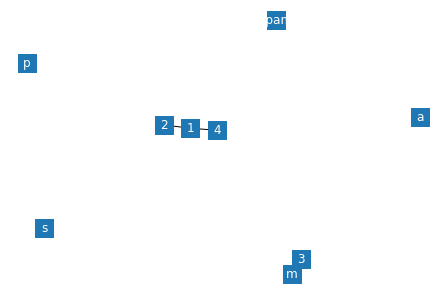

In [ ]:
#show the graoh

def show_graph(graph):
    nx.draw(graph, with_labels = True, font_color = 'white', node_shape = 's')
    
#show_graph(DG)
show_graph(G)

#Examining the elements of a graph

In [140]:
print(list(G.nodes))
print(list(G.edges))
#show the adjacent neighbours of a specific node
print(list(G.adj[1]))
#show the degree of a node
print(G.degree[1])
#get the eges relative to a subset of nodes
print(G.edges([2, 'm']))
#get the degree of a set of nodes
print(G.degree([1, 3]))

[1, 2, 4, 'spam', 's', 'p', 'a', 'm', 3]
[(1, 2), (1, 4), ('m', 3)]
[2, 4]
2
[(2, 1), ('m', 3)]
[(1, 2), (3, 1)]


#Removing the elements of a graph 

In [141]:
G.remove_node(3)
#remove the nodes labelles  's' 'p' 'a' 'm'
G.remove_nodes_from("spam")
print(list(G.nodes))
G.remove_edge(1, 4)

[1, 2, 4, 'spam']


# Using  graph contructors

In [142]:
G.add_edge(1, 2)
G.add_edge(1,3)
G.add_edge(1,5)
G.remove_edges_from([(1,3),(1,5)])
print(G.nodes )
#create a graph from the edge list
H = nx.DiGraph(G)
print(list(H.edges()))
#create a dictionary of adjancies
adjacency_dict = {0: (1, 2), 1: (0, 2), 2: (0, 1)}
H = nx.Graph(adjacency_dict)
list(H.edges())

[1, 2, 4, 'spam', 3, 5]
[(1, 2), (2, 1)]


[(0, 1), (0, 2), (1, 2)]

#Accessing edges and neighbours

In [143]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
print(G.edges)
print((G.nodes))
#same as getting the  neigboutrs
G[2]  # same as G.adj[1]
#node 1 s neighbour edge attribute
#invoking  an edge using .edge  atrribute returns the label of that edge 
print(G.edges[1,2])

[(1, 2)]
[1, 2]
{'color': 'yellow'}


In [144]:
G.add_edge(1,3)

#two lines doing the same thing for different nodes
G[1][3]['color']="blue"
G.edges[1, 2]['color'] = "red"
print(G.edges[1, 2])

{'color': 'red'}


#Retrive data from weighted graph

In [145]:


FG = nx.Graph()
#adding weighted edges
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])t
# for noode and neighbours in  the neighbours dictionary
for n, nbrs in FG.adj.items():
  # for each neighbiur attribute in each  neighbour dictionary 
   for nbr, eattr in nbrs.items():
        #get the the weight attribute 
       wt = eattr['weight']
       #if the weight is  a smaller float 
       #print the  weight the node and the neighbour 
       if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

# more convemient access to graph data 
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)
(1, 2, 0.125)
(3, 4, 0.375)


#Adding attributes to graphs, nodes, and edges

##Graph attributes

In [160]:
G = nx.Graph(day="Friday")
# assigning grph level atttributes
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

##Node level ttributes

In [163]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]['room'] = 714
print(G.nodes.data())
print(G.edges.data())


[(1, {'time': '5pm', 'room': 714}), (3, {'time': '2pm'})]
[]


## Edge level attributes

In [170]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2
print(G.nodes.data())
print(G.edges.data)

[(1, {'time': '5pm', 'room': 714}), (3, {'time': '2pm'}), (2, {}), (4, {}), (5, {})]
<bound method OutEdgeView.data of EdgeView([(1, 2), (3, 4), (3, 2), (4, 5)])>


#Directed graphs 

In [191]:
DG=nx.DiGraph()
DG.add_weighted_edges_from([(1,2,0.5),(3,1,0.75)])
DG.out_degree(1, weight='weight')
print(list(DG.successors(1)))
print(list(DG.neighbors(1)))
print(list(DG.predecessors(1)))
print(DG.nodes.data)
print(DG.edges.data)


[2]
[2]
[3]
<bound method NodeView.data of NodeView((1, 2, 3))>
<bound method OutEdgeView.data of OutEdgeView([(1, 2), (3, 1)])>


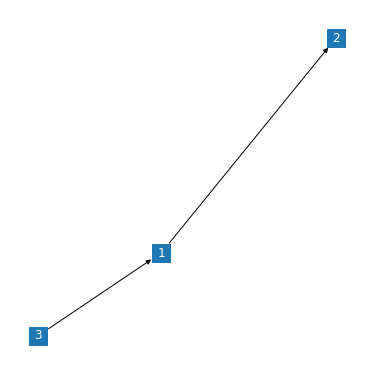

In [186]:
show_graph(DG)

In [193]:
H = nx.Graph(G)  # create an undirected graph H from a directed graph G


#Multigraphs

In [194]:

# notv  coollection of graohs as initially though
#just a bunch of extra vertixes between the same two nodes 
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))
{1: 1.25, 2: 1.75, 3: 0.5}
GG = nx.Graph()
for n, nbrs in MG.adjacency():
   for nbr, edict in nbrs.items():
       minvalue = min([d['weight'] for d in edict.values()])
       GG.add_edge(n, nbr, weight = minvalue)

nx.shortest_path(GG, 1, 3)

[1, 2, 3]

# Ways to generate graphs in networkX
```



## Subraph

In [209]:
#create a fully connected graph with  n nodes connected by n-1 edges
G = nx.path_graph(4)
print(G, 'nodes', G.nodes,'edges',G.edges)

H = G.subgraph([0, 1, 2])
list(H.edges)
print(H, 'nodes', H.nodes,'edges',H.edges)
#To create a subgraph with its own copy of the edge/node attributes use: 
subgraph=G.subgraph([1,2]).copy()
print(subgraph, 'nodes', subgraph.nodes,'edges',subgraph.edges)

Graph with 4 nodes and 3 edges nodes [0, 1, 2, 3] edges [(0, 1), (1, 2), (2, 3)]
Graph with 3 nodes and 2 edges nodes [0, 1, 2] edges [(0, 1), (1, 2)]
Graph with 2 nodes and 1 edges nodes [1, 2] edges [(1, 2)]


##Union

In [214]:
G = nx.Graph([(0, 1), (0, 2), (1, 2)])
H = nx.Graph([(0, 1), (0, 3), (1, 3), (1, 2)])
U = nx.union(G, H, rename=("G", "H"))
print(U, 'nodes', U.nodes,'edges',U.edges)


Graph with 7 nodes and 7 edges nodes ['G0', 'G1', 'G2', 'H0', 'H1', 'H3', 'H2'] edges [('G0', 'G1'), ('G0', 'G2'), ('G1', 'G2'), ('H0', 'H1'), ('H0', 'H3'), ('H1', 'H3'), ('H1', 'H2')]


## Disjoint  union

In [231]:
G = nx.Graph([(0, 1), (0, 2), (1, 2)])
H = nx.Graph([(0, 3), (1, 2), (2, 3)])
G.nodes[0]["key1"] = 5
H.nodes[0]["key2"] = 10
G.nodes[0]["key3"] = 7

U = nx.disjoint_union(G, H)
print(U, 'nodes', U.nodes(data=True),'edges',U.edges)

Graph with 7 nodes and 6 edges nodes [(0, {'key1': 5, 'key3': 7}), (1, {}), (2, {}), (3, {'key2': 10}), (4, {}), (5, {}), (6, {})] edges [(0, 1), (0, 2), (1, 2), (3, 4), (4, 6), (5, 6)]


AtlasView({1: {}, 2: {}})

##Cartesian product

In [253]:
G = nx.Graph()
H = nx.Graph()
G.add_node(0, a1=True)
G.add_node(1, a4=False)
H.add_node("a" , a2="Spam")
H.add_node('b', a3='sss')
P = nx.cartesian_product(G, H)
print(G.nodes(data=True))
print(H.nodes(data=True))
print(P)
print( P.nodes)
print('edges', P.edges) 

[(0, {'a1': True}), (1, {'a4': False})]
[('a', {'a2': 'Spam'}), ('b', {'a3': 'sss'})]
Graph with 4 nodes and 0 edges
[(0, 'a'), (0, 'b'), (1, 'a'), (1, 'b')]
edges []


##Compose 

In [263]:
G = nx.Graph([(0, 1), (0, 2)])
H = nx.Graph([(0, 1), (1, 2)])
R = nx.compose(G, H)
print(R, 'nodes', R.nodes(data=True),'edges',R.edges)

Graph with 3 nodes and 3 edges nodes [(0, {}), (1, {}), (2, {})] edges [(0, 1), (0, 2), (1, 2)]


In [273]:
G = nx.Graph([(0, 1, {'weight': 2.0}), (3, 0, {'weight': 100.0})])
H = nx.Graph([(0, 1, {'weight': 10.0}), (1, 2, {'weight': -1.0})])
nx.set_node_attributes(G, {0: 'dark', 1: 'light', 3: 'black'}, name='color')
nx.set_node_attributes(H, {0: 'green', 1: 'orange', 2: 'yellow'}, name='color')
GcomposeH = nx.compose(G, H)
GcomposeH.nodes(data=True)


NodeDataView({0: {'color': 'green'}, 1: {'color': 'orange'}, 3: {'color': 'black'}, 2: {'color': 'yellow'}})

In [259]:
node_data = {n: G.nodes[n]['color'] + " " + H.nodes[n]['color'] for n in G.nodes & H.nodes}
nx.set_node_attributes(GcomposeH, node_data, 'color')
print(GcomposeH.nodes[0]['color'])
print(GcomposeH.nodes[3]['color'])

dark green
black


In [260]:
edge_data = {e: G.edges[e]['weight'] * H.edges[e]['weight'] for e in G.edges & H.edges}
nx.set_edge_attributes(GcomposeH, edge_data, 'weight')
print(GcomposeH.edges[(0, 1)]['weight'])

20.0


In [262]:
print(GcomposeH.edges[(3, 0)]['weight'])


100.0



##Complement


In [275]:


G = nx.Graph([(1, 2), (1, 3), (2, 3), (3, 4), (3, 5)])
G_complement = nx.complement(G)
G_complement.edges() # This shows the edges of the complemented graph



EdgeView([(1, 4), (1, 5), (2, 4), (2, 5), (4, 5)])

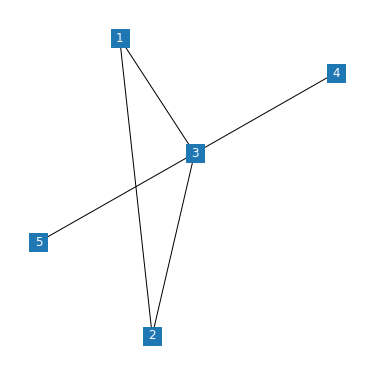

In [278]:
show_graph(G)

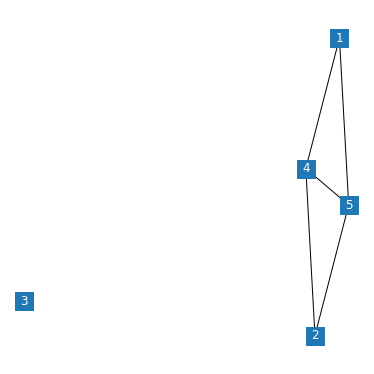

In [280]:
show_graph(G_complement)

##Create empty copy

In [285]:
G = nx.Graph([(1, 2), (1, 3), (2, 3), (3, 4), (3, 5)])
G_copy=nx.create_empty_copy(G, with_data=True)
print(G_copy, G_copy.nodes)

Graph with 5 nodes and 0 edges [1, 2, 3, 4, 5]


##Convert directed graoh to undirected graph

In [291]:
G = nx.DiGraph([(1, 2), (1, 3), (2, 3), (3, 4), (3, 5)])
G_undirected=nx.to_undirected(G)
print(G_undirected)
print(G_undirected.nodes)


Graph with 5 nodes and 5 edges
[1, 2, 3, 4, 5]


##To_directed 

DiGraph with 5 nodes and 10 edges
[1, 2, 3, 4, 5]


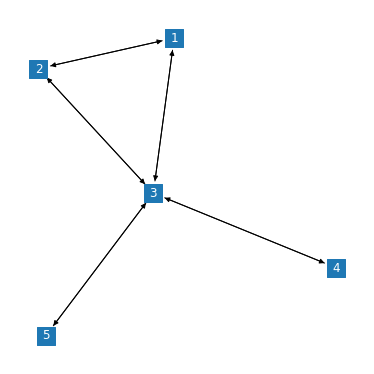

In [294]:
G = nx.Graph([(1, 2), (1, 3), (2, 3), (3, 4), (3, 5)])
G_directed=nx.to_directed(G)
print(G_directed)
print(G_directed.nodes)
show_graph(G_directed)

##Petersen Graph 

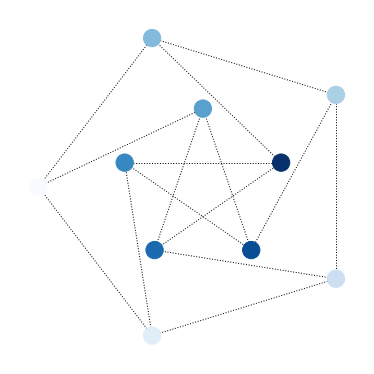

In [301]:

Graph = nx.petersen_graph()
nx.draw_shell(Graph, nlist=[range(5, 10), range(5)],  font_weight='bold',node_color=range(10),cmap=plt.cm.Blues,font_color='r',style='dotted')
plt.show()

## Tutte_graph

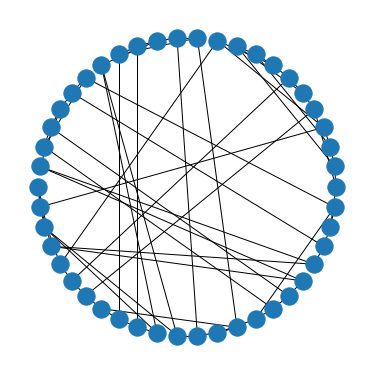

In [303]:
Graph = nx.tutte_graph()
nx.draw_shell(Graph)
plt.show()

##Sedgewick maze graph




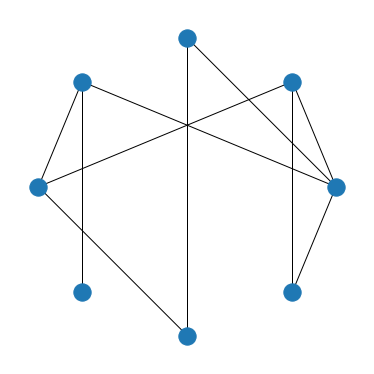

In [305]:
Graph = nx.sedgewick_maze_graph()
nx.draw_shell(Graph)
plt.show()

##Tetrahedral Graph

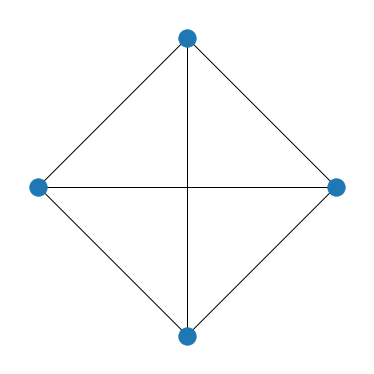

In [306]:
Graph = nx.tetrahedral_graph()
nx.draw_shell(Graph)
plt.show()

##Complete graph 

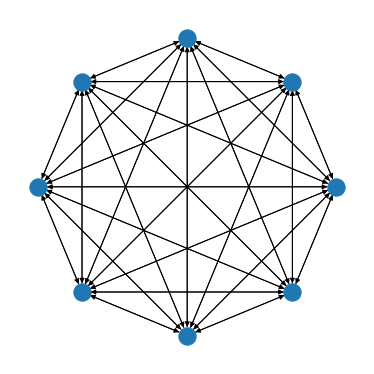

In [310]:
G = nx.complete_graph(9)
G = nx.complete_graph(range(11, 14))
G = nx.complete_graph(8, nx.DiGraph())#
nx.draw_shell(G)
plt.show()

## Barbell graph

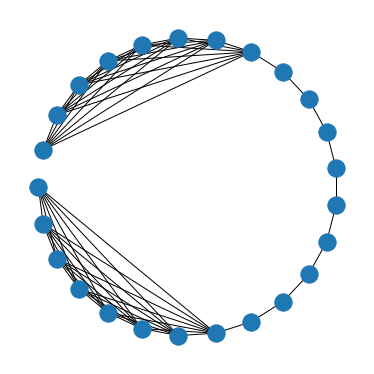

In [312]:
G = nx.barbell_graph(8, 9)#
nx.draw_shell(G)
plt.show()

##Lollipop graph

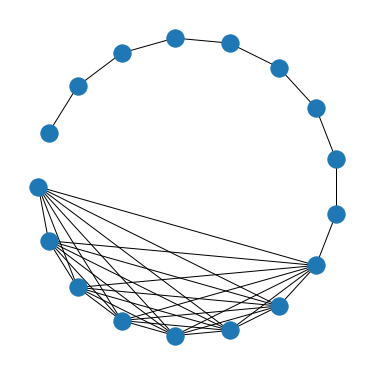

In [314]:
G=nx.lollipop_graph(8, 9)
nx.draw_shell(G)
plt.show()

##Stochastic graph  generator 

### Erdos Renyi graph

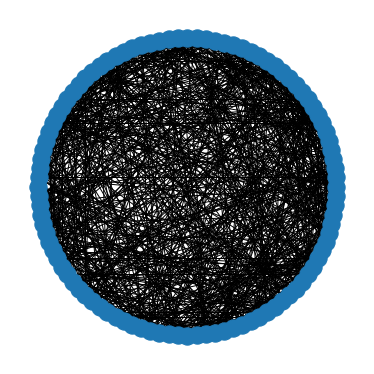

In [316]:
er = nx.erdos_renyi_graph(100, 0.15)
nx.draw_shell(er)
plt.show()

### Watts Strogatz Graph 

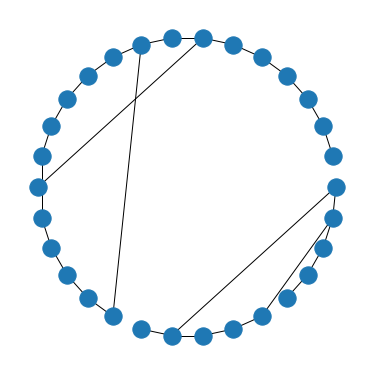

In [318]:
ws = nx.watts_strogatz_graph(30, 3, 0.1)
nx.draw_shell(ws)
plt.show()

### Barabasi Albert Graph

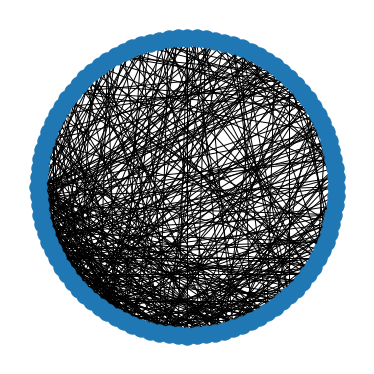

In [319]:
ba = nx.barabasi_albert_graph(100, 5)
nx.draw_shell(ba)
plt.show()

###Random Lobster Graph

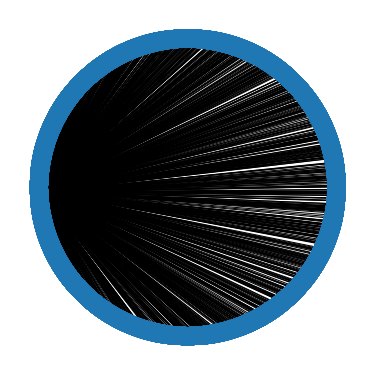

In [321]:
red = nx.random_lobster(100, 0.9, 0.9)
nx.draw_shell(red)
plt.show()

# Converting an RDKit  molecule into a graph in NetworkX

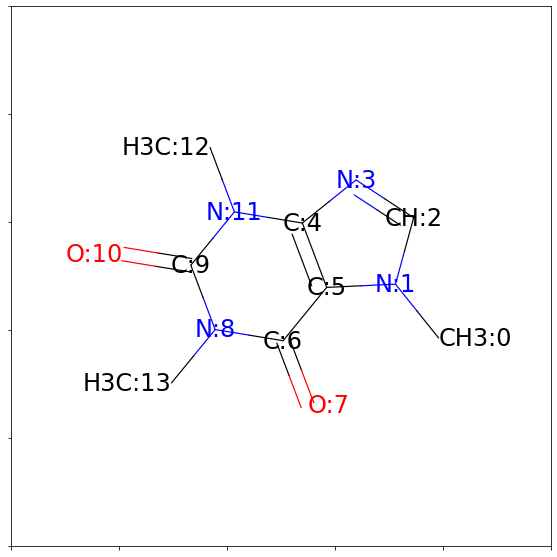

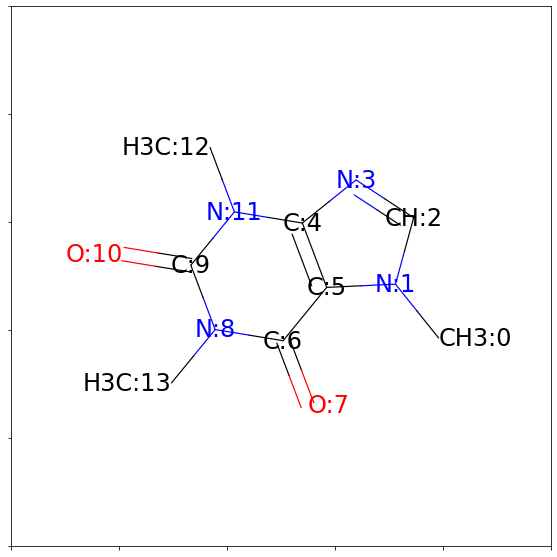

In [27]:
# define the smiles string and covert it into a molecule sturcture ------------
caffeine_smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'

mol = Chem.MolFromSmiles(caffeine_smiles)

# draw the modecule -----------------------------------------------------------
Draw.MolToFile(mol, 'caffeine.png')

# draw the molecule with property ---------------------------------------------
for i, atom in enumerate(mol.GetAtoms()):
    atom.SetProp("molAtomMapNumber", str(atom.GetIdx()))
    
Draw.MolToMPL(mol)

Saving HIV.csv to HIV.csv


In [16]:

df = pd.read_csv(io.StringIO(uploaded['HIV.csv'].decode('utf-8')))
df

,smiles,activity,HIV_active
0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,CI,0
1,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...,CI,0
2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,CI,0
3,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1,CI,0
4,O=S(=O)(O)CCS(=O)(=O)O,CI,0
...,...,...,...
41122,CCC1CCC2c3c([nH]c4ccc(C)cc34)C3C(=O)N(N(C)C)C(...,CI,0
41123,Cc1ccc2[nH]c3c(c2c1)C1CCC(C(C)(C)C)CC1C1C(=O)N...,CI,0
41124,Cc1ccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)C...,CI,0
41125,Cc1cccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)...,CI,0


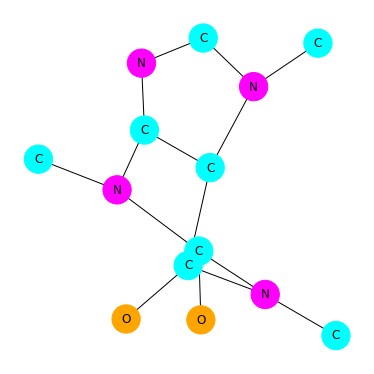

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [21]:

# define the smiles string and covert it into a molecule sturcture ------------
caffeine_smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'
caffeine_mol = Chem.MolFromSmiles(caffeine_smiles)

# define the function for coverting rdkit object to networkx object -----------     
def mol_to_nx(mol):
    G = nx.Graph()

    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(),
                   atomic_num=atom.GetAtomicNum(),
                   is_aromatic=atom.GetIsAromatic(),
                   atom_symbol=atom.GetSymbol())
        
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=bond.GetBondType())
        
    return G

# conver rdkit object to networkx object --------------------------------------
caffeine_nx = mol_to_nx(caffeine_mol)

caffeine_atom = nx.get_node_attributes(caffeine_nx, 'atom_symbol')

color_map = {'C': 'cyan',
             'O': 'orange',
             'N': 'magenta'}  

caffeine_colors = []
for idx in caffeine_nx.nodes():
    if (caffeine_nx.nodes[idx]['atom_symbol'] in color_map):
        caffeine_colors.append(color_map[caffeine_nx.nodes[idx]['atom_symbol']])
    else:
        caffeine_colors.append('gray')
    
nx.draw(caffeine_nx,
        labels=caffeine_atom,
        with_labels = True,
        node_color=caffeine_colors,
        node_size=800)

plt.show()

# print out the adjacency matrix ---------------------------------------------- 
matrix = nx.to_numpy_matrix(caffeine_nx)
print(matrix)

In [24]:


print(">>> read the data file ... ")
hiv = pd.read_csv('HIV.csv')
print(">>> data shape = ", hiv.shape)
print(">>> data columns = ", hiv.columns, "\n")
print(hiv)
print()

print(">>> create mol from smiles ... ")
hiv['mol'] = hiv['smiles'].apply(lambda x: Chem.MolFromSmiles(x)) 

# define the function for coverting rdkit object to networkx object -----------     
def mol_to_nx(mol):
    G = nx.Graph()

    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(),
                   atomic_num=atom.GetAtomicNum(),
                   is_aromatic=atom.GetIsAromatic(),
                   atom_symbol=atom.GetSymbol())
        
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=bond.GetBondType())
        
    return G

print(">>> create nx from mol ... ")
hiv['graph'] = hiv['mol'].apply(lambda x: mol_to_nx(x))

print(">>> create graph embedding ... ")
model = Graph2Vec()
model.fit(hiv['graph'])
hiv_graph2vec = model.get_embedding()

hiv_graph2vec = pd.DataFrame(hiv_graph2vec)
print(">>> hiv_graph2vec shape = ", hiv_graph2vec.shape)
print(hiv_graph2vec)
print()

>>> read the data file ... 
>>> data shape =  (41127, 3)
>>> data columns =  Index(['smiles', 'activity', 'HIV_active'], dtype='object') 

                                                  smiles activity  HIV_active
0      CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...       CI           0
1      C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...       CI           0
2                       CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21       CI           0
3        Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1       CI           0
4                                 O=S(=O)(O)CCS(=O)(=O)O       CI           0
...                                                  ...      ...         ...
41122  CCC1CCC2c3c([nH]c4ccc(C)cc34)C3C(=O)N(N(C)C)C(...       CI           0
41123  Cc1ccc2[nH]c3c(c2c1)C1CCC(C(C)(C)C)CC1C1C(=O)N...       CI           0
41124  Cc1ccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)C...       CI           0
41125  Cc1cccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)...       CI           0
411